In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [49]:
df = pd.read_csv("/content/placement-dataset.csv")

In [50]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [51]:
del df["city"]

In [52]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [53]:
df.dropna(inplace=True)

In [54]:
df = df.reset_index(drop=True)

In [55]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,7.4,132.0,1
3,5.8,142.0,0
4,7.1,48.0,1


In [56]:
df.shape

(88, 3)

In [67]:
numeric_cols = ['cgpa', 'iq']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [68]:
df.head()

,cgpa,iq,placement
0,0.673077,0.438776,1
1,0.500000,0.352041,0
2,0.788462,0.484694,1
3,0.480769,0.535714,0
4,0.730769,0.056122,1


<Axes: xlabel='cgpa', ylabel='iq'>

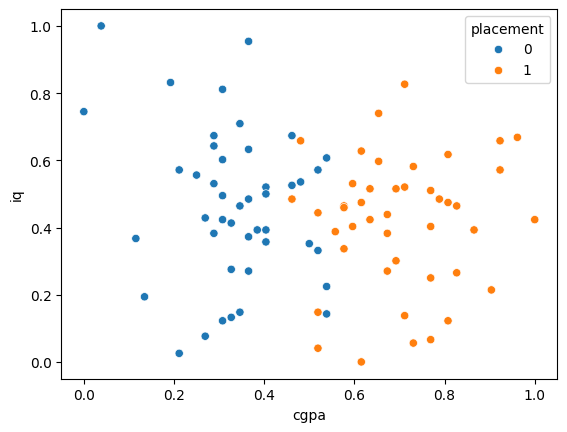

In [69]:
sns.scatterplot(x=df["cgpa"],y=df["iq"],hue=df["placement"])

In [70]:
def step(z):
    return 1 if z>0 else 0

In [71]:
def perceptron(X,y):

    X = X.to_numpy()
    y = y.to_numpy()

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,len(X))
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [72]:
X = df[["cgpa","iq"]]
y = df["placement"]

In [73]:
intercept_,coef_ = perceptron(X,y)

In [74]:
print(coef_)
print(intercept_)

[0.89615385 0.03928571]
-0.3999999999999999


In [75]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [76]:
x_input = np.linspace(X["cgpa"].min(), X["cgpa"].max(), 100)
y_input = m*x_input + b

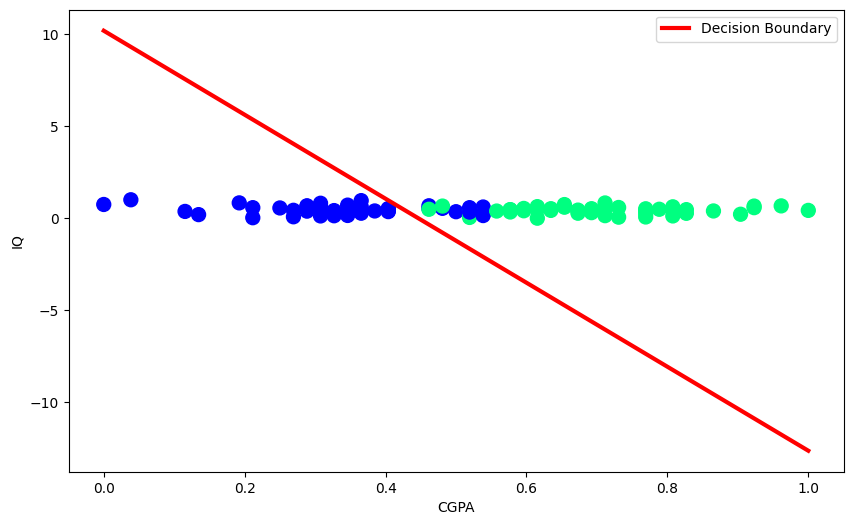

In [77]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3, label="Decision Boundary")
plt.scatter(X["cgpa"], X["iq"], c=y.to_numpy(), cmap='winter', s=100)
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend()
plt.show()